In [1]:
# ^TWII大盤
# 00672L元大S&P原油正2
# 00673R元大S&P原油反1
# 1216統一
# 2330台積電
# 2412中華電
# 2002中鋼
# 2317鴻海

In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import pandas_datareader.data as web
from talib import abstract
import talib
import mpl_finance as mpf

stock_code = "1216.tw"
data = datetime(2018,4,1)

# 讀取從指定日期之後的股價資訊
df = web.DataReader(stock_code, "yahoo", data)
df.columns = ['high', 'low', 'open', 'close', 'volume', 'adj close']

Text(0.5,1,'SMA')

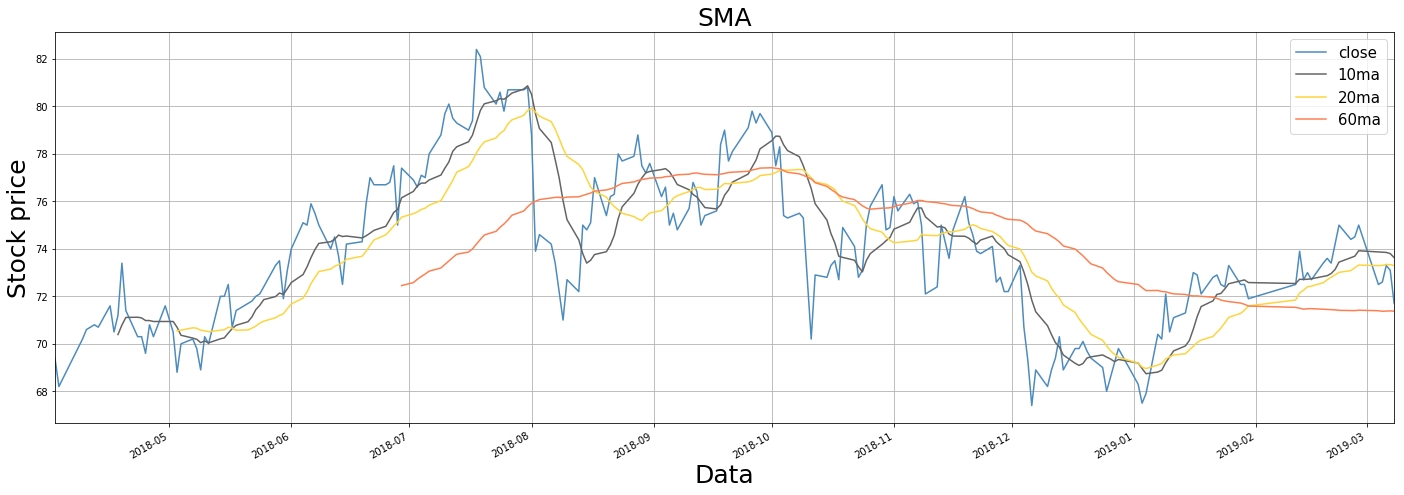

In [3]:
df['close'].plot(color="#4B8BBE", grid=True, figsize=(24, 8))
abstract.SMA(df, 10).plot(color="#646464", label="10ma", grid=True)
abstract.SMA(df, 20).plot(color="#FFD43B", label="20ma", grid=True)
abstract.SMA(df, 60).plot(color="coral", label="60ma", grid=True)
plt.legend(prop={'size':15})
plt.xlabel('Data', size=25) 
plt.ylabel('Stock price', size=25) 
plt.title("SMA", size=25)

Text(0.5,1,'BBands')

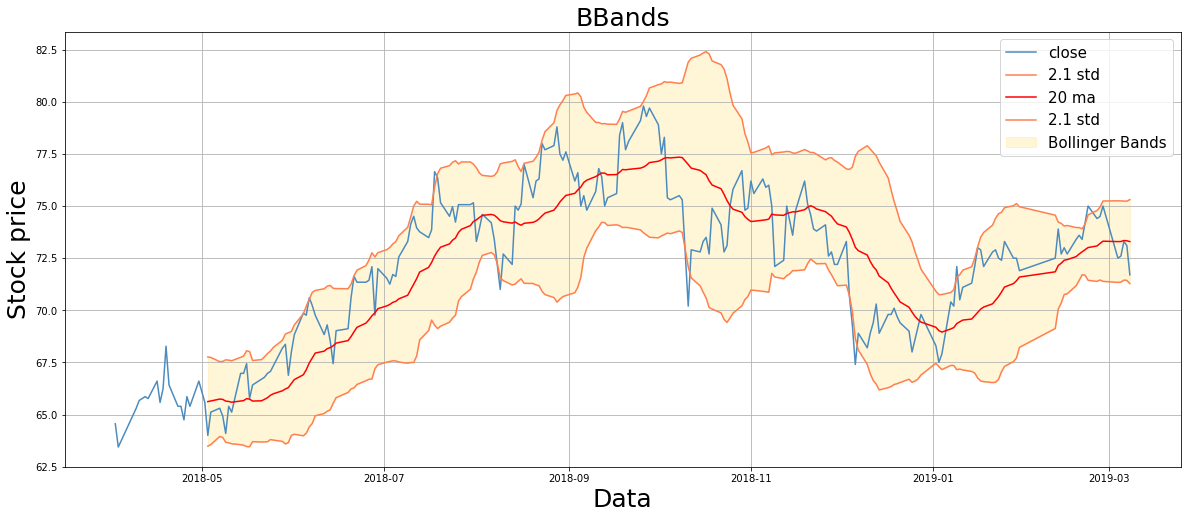

In [4]:
nbdevup = 2.1
nbdevdn = 2.1
timeperiod = 20

# bbands策略,N=20
df['%sma'%timeperiod] = pd.Series.rolling(df['adj close'], window=timeperiod).mean()
df['std'] = pd.Series.rolling(df['adj close'], window=timeperiod).std()
# 上軌=20ma+1.5sd ,中軌=20ma, 下軌=20ma-1.5sd
df['ubb'] = df['%sma'%timeperiod] + nbdevup*df['std']
df['mbb'] = df['%sma'%timeperiod]
df['lbb'] = df['%sma'%timeperiod] - nbdevdn*df['std']
# df[['adj close','ubb','mbb', 'lbb']].plot(grid=True, figsize=(20,10))
fig = plt.figure(figsize=(20,8))
plt.grid(True)
plt.plot(df[['adj close']], color="#4B8BBE", label="close")
plt.plot(df[['ubb']], color="coral", label="%s std"%nbdevup)
plt.plot(df[['mbb']], color="red", label='%s ma'%timeperiod)
plt.plot(df[['lbb']], color="coral", label="%s std"%nbdevdn)
plt.fill_between(df[['mbb']].index, np.squeeze(df[['lbb']]), np.squeeze(df[['ubb']]), alpha=0.2, label='Bollinger Bands', color="#FFD43B")
plt.legend(prop={'size':15})
plt.xlabel('Data', size=25) 
plt.ylabel('Stock price', size=25) 
plt.title("BBands", size=25)

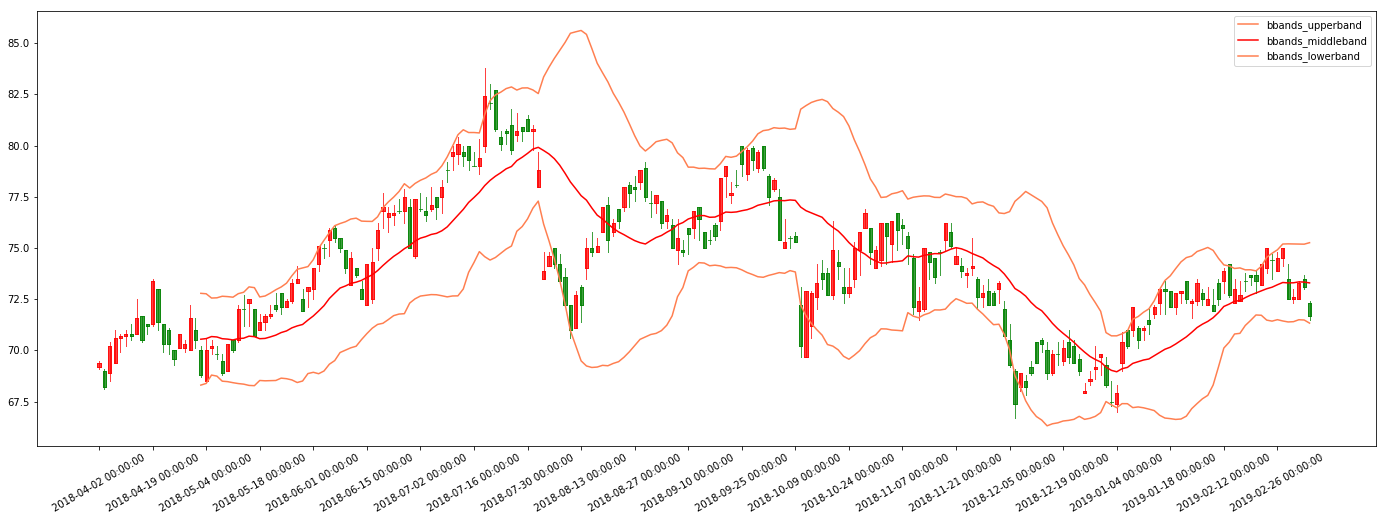

In [5]:
sma_20 = talib.SMA(np.array(df['close']), 20)
sma_30 = talib.SMA(np.array(df['close']), 30)
bbands_upperband = np.array(abstract.BBANDS(df, 20, 2.1, 2.1)["upperband"])
bbands_middleband = np.array(abstract.BBANDS(df, 20, 2.1, 2.1)["middleband"])
bbands_lowerband = np.array(abstract.BBANDS(df, 20, 2.1, 2.1)["lowerband"]) 
fig = plt.figure(figsize=(24, 8))
ax = fig.add_subplot(1, 1, 1)
ax.set_xticks(range(0, len(df.index), 10))
ax.set_xticklabels(df.index[::10])
mpf.candlestick2_ochl(ax, df['open'], df['close'], df['high'],
                      df['low'], width=0.6, colorup='r', colordown='g', alpha=0.75)
# plt.rcParams['font.sans-serif']=['‪kaiu'] 

plt.xticks(rotation=30)
# ax.plot(sma_20, label='20MA')
# ax.plot(sma_30, label='30MA')
ax.plot(bbands_upperband, label='bbands_upperband', color="coral")
ax.plot(bbands_middleband, label='bbands_middleband', color="red")
ax.plot(bbands_lowerband, label='bbands_lowerband', color="coral")

ax.legend()

(array([  0,  10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120,
        130, 140, 150, 160, 170, 180, 190, 200, 210, 220]),
 <a list of 23 Text xticklabel objects>)

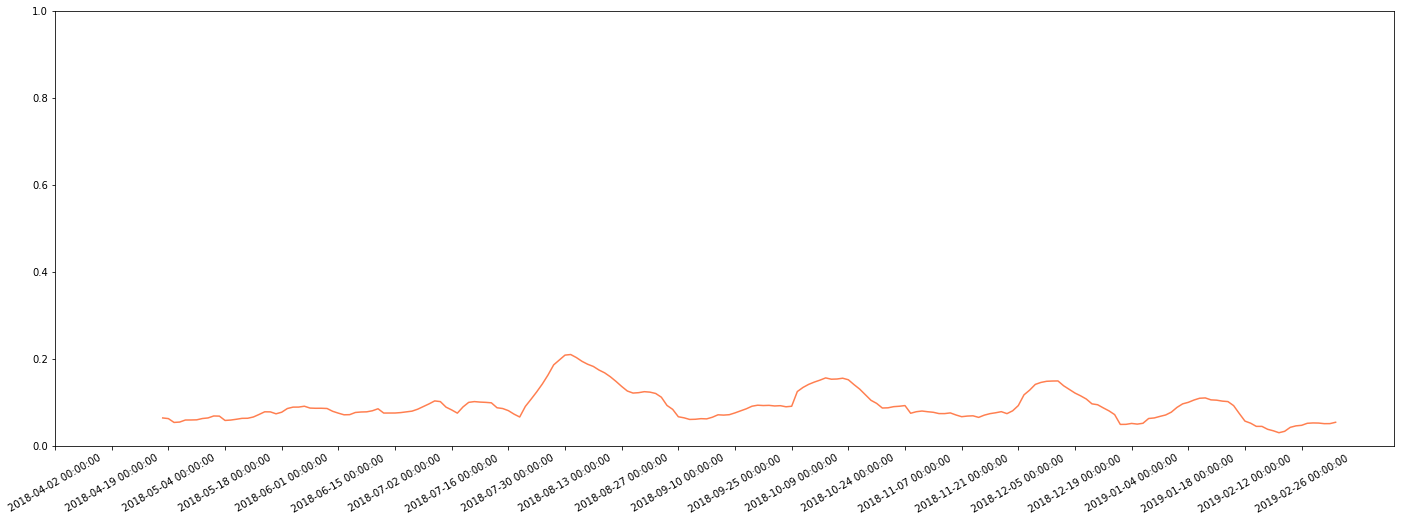

In [6]:
BW = (bbands_upperband - bbands_lowerband) / bbands_middleband
fig = plt.figure(figsize=(24, 8))
ax = fig.add_subplot(1, 1, 1)
ax.plot(BW, label='BW', color="coral")
ax.set_ylim(0,1) 
ax.set_xticks(range(0, len(df.index), 10))
ax.set_xticklabels(df.index[::10])
plt.xticks(rotation=30)